# Dimensionality Reduction Tutorial

During the next 30 minutes, we want to repeat the most important topics from the lecture and learn how to implement these in python. You will need this among others for the excercise. 
We will download the famous MNIST data set, perform dimensionality reduction and cluster the results. 

In [2]:
import numpy as np 
np.set_printoptions(precision=3) # numpy prints all numbers up to 3rd decimals 
import pandas as pd # data manipulation package (excel for python) with lots of useful functions based on numpy
import matplotlib.pyplot as plt # plotting library
from tensorflow.keras.datasets import mnist # the data set 
from sklearn.preprocessing import StandardScaler # scaler that can transform all data to mean=0 and std=1
from sklearn.decomposition import PCA # principal component analysis
from sklearn.cluster import KMeans # clustering algorithm
#################
import seaborn as sns # advanced plotting library  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Here we load a data set and inspect it superficially. We are working with pictures of handwritten digits. The MNIST dataset contains 60,000 training images and 10,000 testing images.

In [4]:
# load it
data = mnist.load_data()

The MNIST dataset is organized as following: 

data is a tuple with length 2: data[0] is the trainset and data[1] the testset. 

Each of data[0] and data[1] is again a tuple with length 2: data[x][0] are the features in an 28x28 array and data[x][1] are the labels in type numpy.uint8 (integers). 

In [34]:
# inspecting
print("Shape of training features: ", data[0][0].shape)
print("Shape of training targets: ", data[0][1].shape)
print("First training data point looks like this:\n", data[0][0][0])

Shape of training features:  (60000, 28, 28)
Shape of training targets:  (60000,)
First training data point looks like this:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 2

In this 28x28 array, zero means white, 253 means black and in between there is grey. It is difficult to interpret with the eye. Let's visualize it.

The target of the first training data point is:  5
The visualized pixels look like this:


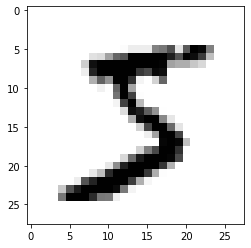

In [38]:
print("The target of the first training data point is: ", data[0][1][0])
print("The visualized pixels look like this:")
plt.imshow(data[0][0][0], cmap = plt.cm.binary)
plt.show()

After inspecting the data set, we declare variables for convenience to not get confused by data[x][y].

In [43]:
(X_train,y_train), (X_test,y_test) = data
print("Training features have shape: ", X_train.shape) 

Training features have shape:  (60000, 28, 28)


We will follow the typical workflow as we have done in previous exercises:
1. Split Train and Test set (aleady done in this dataset) 
2. Normalize the data so that mean=0 and standard deviation=1
3. Train a model with the training set 
4. Predict the the test set with the settings obtained from training
5. Evaluate the performance 

Let's continue with normalization:

In [44]:
# instantiate standard scaler 
scaler = StandardScaler()
# fit the scaler to the training data and transform the training data
print("Shape before flattening: ", X_train.shape)
X_train = X_train.reshape(-1, 28*28) # flatten the 28x28 images to 784x1 
print("Shape after flattening: ", X_train.shape)
X_train = scaler.fit_transform(X_train)


Shape before flattening:  (60000, 28, 28)
Shape after flattening:  (60000, 784)


Now, we have 60,000 training data points and each is represented as a single vector of dimension 784. Inspecting the first data points makes you see that the pixel values were scaled from (0,253) to values around 0.

In [41]:
print("First training data point contains positive and negative entries:\n", X_train[0])

First training data point contains positive and negative entries:
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
 -4.418e-03 -5.755e-03 -4.083e-03 -4.083e-03  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00 -4.083e-03 -4.710e-03 -8.799e-03 -1.159e-02
 -1.476e-02 -1.928e-02 -2.467e-02 -2.907e-02 -3.059e-02 -3.116e-02
 -3.196e-02 -3.020e-02 -3.131e-02 -2.838e-02 -2.312e-02 -1.917e-02
 -1.677e-02 -1.100e-02 -8.325e-03 -4.381e-03  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00 -4.083e-03 -5.395e-03
 -8.522e-03 -1.199e-02 -1.765e-02 -2.771e-02 -3.702e-02 -5.215e-02
 -6.704e-02 -8.302e-02 -9.938e-02 -1.152e-01 -1.291e-01 -1.384e-01
 -1.389e-01 -1.318e-01 -1.204e-01 -1.019e-01 -7.860e-02 -5.700e-02
 -3.966e-02 -2.373e-02 -1.409e-02 -7.831e-03  0.000e+00  0.000

Now we want to reduce the dimension (784 dim) with Principal Component Analysis. There will be only 3 lines of code with much theory behind it. Let's repeat the most important parts: 

Definition: Technique to transform a number of possibly correlated variables into a smaller number of variables called principal components. 

Workflow: 
1. Build covariance matrix 
2. Get eigenvectors and eigenvalues 
3. Sort eigenvalues from highest to lowest 
4. Project data set to the Principal Components 

Mathematics: 
1. Assume n observations, each having p variables. All data is:
$$ R = \begin{pmatrix} 
r_{11} & r_{12} & \cdots & r_{1p} \\
r_{21} & r_{22} & \cdots & r_{2p} \\
\vdots & \vdots  & \vdots & \vdots \\
r_{n1} & r_{n2} & \cdots & r_{np} \\
 \end{pmatrix} $$
 with one row being one observation. In general, the covariance is given by: 
$$ Cov(X,Y) = {1 \over N-1} \sum_{i=1}^N((x_i - \overline{x}) (y_i - \overline{y})) $$
The covariance matrix (pxp) looks like: 
$$ C_x = \begin{pmatrix} 
cov_{11} & cov_{12} & \cdots & cov_{1p} \\
cov_{21} & cov_{22} & \cdots & cov_{2p} \\
\vdots & \vdots  & \vdots & \vdots \\
cov_{p1} & cov_{p2} & \cdots & cov_{pp} \\
 \end{pmatrix} $$

In [5]:
y: np.ndarray = np.array(data["MolWt"])
x: np.ndarray = np.array(data["HeavyAtomCount"])
print("x.shape original:\n", x.shape, "\nfirst 3 entries:\n", x[:3])
# add an extra dimension to x
x: np.ndarray = np.stack([np.ones_like(x), x], axis=1)
print("\nx.shape after np.stack:\n", x.shape, "\nfirst 3 entries: \n", x[:3])

# Calculate weights with numpy's matrix product np.matmul (shortcut "@") and its inverting function linalg.inv()
print("\ncalculating weights...")
w: np.ndarray = np.linalg.inv((x.T @ x)) @ x.T @ y
print("weights =",w) 

x.shape original:
 (9982,) 
first 3 entries:
 [23. 13.  9.]

x.shape after np.stack:
 (9982, 2) 
first 3 entries: 
 [[ 1. 23.]
 [ 1. 13.]
 [ 1.  9.]]

calculating weights...
weights = [18.234 14.299]


We found an analytical expression: The intercept $w_0$ is 18.2 and the coefficient $w_1$ is 14.3. Let's see how good the fit is: 

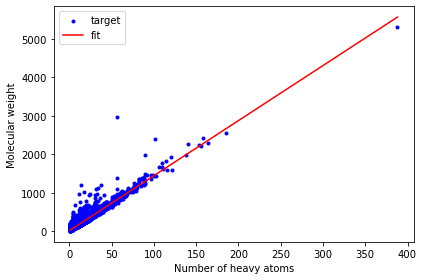

In [6]:
# plot the molecular weight and the linearly transformed number of heavy atoms

# create the figure
fig, ax = plt.subplots() 
# plot blue scatters
ax.scatter(data["HeavyAtomCount"], data["MolWt"], color="blue", marker=".", label="target")
# for the linear fit, create 1000 values between the minimum and maximum number of heavy atoms
x_values = np.linspace(data["HeavyAtomCount"].min(), data["HeavyAtomCount"].max(), 1000)
# plot the linear fit with the weights
ax.plot(x_values, w[0]+x_values*w[1], color="red", label="fit")
# set appearance of axis and create a legend
ax.set_xlabel("Number of heavy atoms")
ax.set_ylabel("Molecular weight")
ax.legend() 
plt.tight_layout() 
# show the plot 
plt.show() 

This looks good. We will talk about quantifying the goodness of a fit later. 

Luckily, the same job can be done with sophisticated packages like scikit learn. It is easy to use and only needs a few steps:

In [17]:
# data parsing
y: np.ndarray = np.array(data["MolWt"])
# reshaping to (-1,1) makes [1,2,3] to [[1],[2],[3]]. This is often needed for sklearn.
# Have this in mind when you use 1-dim numpy arrays with sklearn functions and get errors about wrong shapes.
x: np.ndarray = np.array(data["HeavyAtomCount"]).reshape(-1,1) 
# create a model object (we imported it from sklearn)
regr = LinearRegression()
# the determination of weights is called fitting (or training)
regr.fit(x, y)
# get the weights
print("The weights obtained from scikit-learn are:\n", regr.intercept_, " and ", regr.coef_[0])
print("The weights obtained from numpy are:\n", w[0], " and ", w[1])

The weights obtained from scikit-learn are:
 18.233651405997847  and  14.298529479612462
The weights obtained from numpy are:
 18.233651405997996  and  14.29852947961246


The results are identical, because scikit-learn does the exact same analytical calculation (Ordinary Least Squares) under the hood. We will see deviations of machine learned coefficients in the next lectures. 

#### Multiple Regression

Let's try the same procedure for a more complicated problem: Can we predict the solubility of a molecule with its molecular weight, its accesssible surface area and its Number of hydrogen-bond-donors and -acceptors? 

In [8]:
# parsing
y_multi: pd.Series = data["Solubility"]
x_multi: pd.DataFrame = data[["MolWt", "LabuteASA", "NumHAcceptors","NumHDonors"]]

Again, let's check whether the data set has any issues (NaN or missing values)...

In [9]:
# check molecular weight entries#
print(data["MolWt"].describe()[0]) # only print the first line which is the count 
print(data["MolWt"].isna().sum())
print(data["LabuteASA"].describe()[0] )
print(data["LabuteASA"].isna().sum())
print(data["NumHAcceptors"].describe()[0] )
print(data["NumHAcceptors"].isna().sum())
print(data["NumHDonors"].describe()[0] )
print(data["NumHDonors"].isna().sum())

9982.0
0
9982.0
0
9982.0
0
9982.0
0


... there are zero NaN values and the value count for all features is 9982. Let's visualize the pairwise linear correlations. Before executing the next cell, which linear correlations do you expect between molecular weight, ASA, H-bond-donors, H-bond-acceptors and solubility?

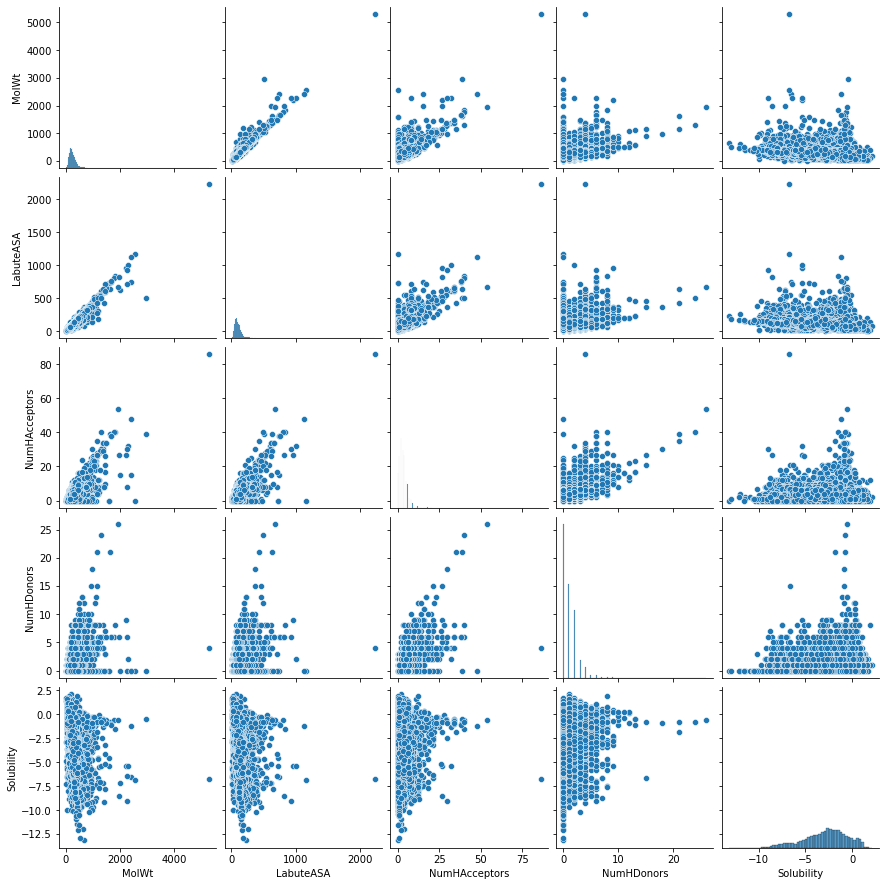

In [10]:
sns.pairplot(data[["MolWt", "LabuteASA", "NumHAcceptors", "NumHDonors", "Solubility"]])
sns.set_context("notebook")
plt.show()

We cannot see any pairwise linear correlation between solubility and the 4 features (last row/column). You see a linear correlation between ASA and the number of H-bond donors or acceptors, which makes intuitive sense.
To predict solubility, we will try our best with multiple linear regression:

A very common strategy in ML is to split the data set into train and test sets. This allows evaluating the performance of the model on a test set, that the model has not seen during training. 

In [11]:
# split it into 80/20 train/test
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2)
print("Training features have shape: ", x_train.shape)
print("Testing features have shape: ", x_test.shape)
print("Training targets have shape: ", y_train.shape)
print("Testing targets have shape: ", y_test.shape)

Training features have shape:  (7985, 4)
Testing features have shape:  (1997, 4)
Training targets have shape:  (7985,)
Testing targets have shape:  (1997,)


Train the model for multilinear regression.

In [12]:
multiregr: LinearRegression = LinearRegression()
multiregr.fit(x_train, y_train)
print("The weights obtained from scikit-learn are:\n", multiregr.intercept_, " and ", multiregr.coef_)
print(f"As a reminder: The features used for the fit were: {list(x_multi.columns)}")

The weights obtained from scikit-learn are:
 -1.5860214936838979  and  [-0.008 -0.009  0.415  0.24 ]
As a reminder: The features used for the fit were: ['MolWt', 'LabuteASA', 'NumHAcceptors', 'NumHDonors']


Note that there are 4 coefficients, one for each feature and still one bias $w_0$. You can relate the coefficients with feature importance, which is not easily possible with many other machine learning methods. A negative coefficient means negative correlation, a positive means positive correlation and zero means no correlation. We can see that the more H-bond-acceptors and -donors, the more soluble the molecule is, whereas the molecular weight and the ASA are not important for the solubility. 

#### Evaluation

We cannot plot 5 dimensions, easily. But because of the test set, we can evaluate the model's performance on data, that the model hasn't seen before.

Common metrics for quantitative predictions are the mean absolute error (MAE), root mean squared error (RMSE) and the coefficient of determination (R2). The R2 score sets the error in relation to just predicting the mean of the data. A value of 0 is equal to always predicting the mean, a value of 1 means perfect correlation without any error.
E.g. via the mean absolute error, the root mean squared error and the coefficient of determination (R2):

$$
\begin{align}
MAE &= \frac{1}{n} \sum_i^n | y_{true} - y_{pred} | \\
RMSE &= \sqrt{\frac{1}{n} \sum_i^n (y_{true} - y_{pred})^2} \\
R_2 &= 1- \frac{\sum_i (y_{true} - y_{pred})^2}{\sum_i (y_{true} - \bar{y})^2}
\end{align}
$$

In [13]:
# get the predictions
predictions: np.ndarray = multiregr.predict(x_test)
# and compare them agains the true values y_test 
print("MAE = ", mean_absolute_error(y_test, predictions))
print("RMSE = ", mean_squared_error(y_test, predictions, squared=False))
print("R2 = ", r2_score(y_test, predictions))

MAE =  1.4692560361708464
RMSE =  1.993216882184944
R2 =  0.30806901303705336


We can also plot a scatter plot with true values versus predicted values. 

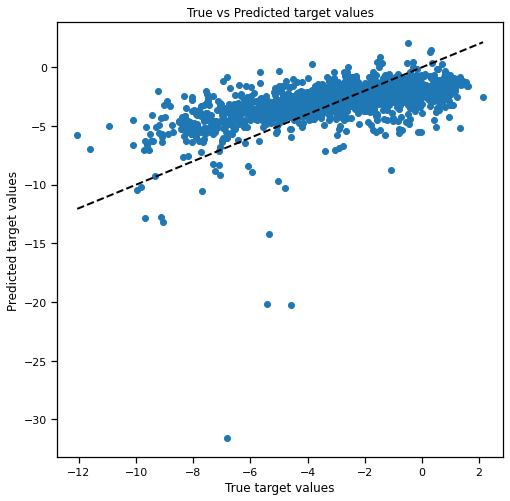

In [14]:
def plot_regression_predictions(y_true: np.ndarray, y_predicted: np.ndarray):
    plt.figure(figsize=(8, 8))
    sns.set_context("notebook")
    plt.scatter(y_true, y_predicted)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel("True target values")
    plt.ylabel("Predicted target values")
    plt.title("True vs Predicted target values")
    plt.show()

plot_regression_predictions(y_test, predictions)

Ideally, every point would lie on the diagonal for perfect correlation.

This is far from the diagonal. We will do one more round with more descriptors: H-bond-donors and Number of Heteroatoms and Number of Saturated Rings. All in one cell:

The coefficients are:
 -1.5828297315940647  and  [-0.008  0.009  0.135  0.194 -0.312  0.14  -0.257]
MAE =  1.2791069021905355
RMSE =  1.6939529713528294
R2 =  0.48808220782777667


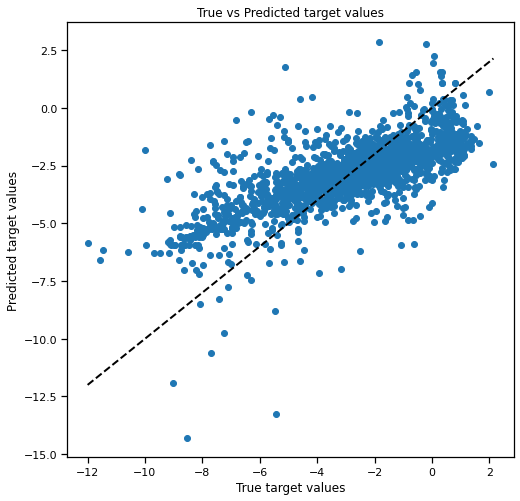

In [15]:
# parsing
y_multi: np.ndarray = np.array(data["Solubility"])
x_multi: np.ndarray = np.array(data[["MolWt", "LabuteASA", "NumHAcceptors","NumHDonors", "RingCount", "NumSaturatedRings","MolLogP"]])
# split it into 80/20 train/test
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2)
# create the model 
multiregr: LinearRegression = LinearRegression()
# fit it 
multiregr.fit(x_train, y_train)
# get the predictions
predictions: np.ndarray = multiregr.predict(x_test)
# print the coefficients 
print("The coefficients are:\n", multiregr.intercept_, " and ", multiregr.coef_)
# evaluate the performance 
print("MAE = ", mean_absolute_error(y_test, predictions))
print("RMSE = ", mean_squared_error(y_test, predictions, squared=False))
print("R2 = ", r2_score(y_test, predictions))
# plot the predictions against the true values 
plot_regression_predictions(y_test, predictions)

The predictions get slightly better, but still not good.

The last cell in this tutorial is about Ridge Regression that penalizes the RSS additionally to keep the weights as small as possible. 


\begin{equation*}
RSS = \sum_i^n (y_{i,true} - y_{i,pred})^2 + \lambda \sum_{k=1}^p |w_k|^2 = (\mathbf{X} \mathbf{w} - \mathbf{y})^T(\mathbf{X} \mathbf{w} - \mathbf{y}) + \lambda w^Tw 
\end{equation*}

So we have to find the weights via:

\begin{equation*}
\mathbf{w} = (\mathbf{X^T}\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X^T}\mathbf{y}
\end{equation*}

The implementation is very easy. We only have to specify the value of the hyperparameter $\lambda$ which is called alpha in sklearn. We use the splitted train and test set from the cell before.

The coefficients are:
 -1.5828259858111422  and  [-0.008  0.009  0.135  0.194 -0.312  0.14  -0.257]
MAE =  1.2791085292911182
RMSE =  1.6939539347385775
R2 =  0.4880816255513455


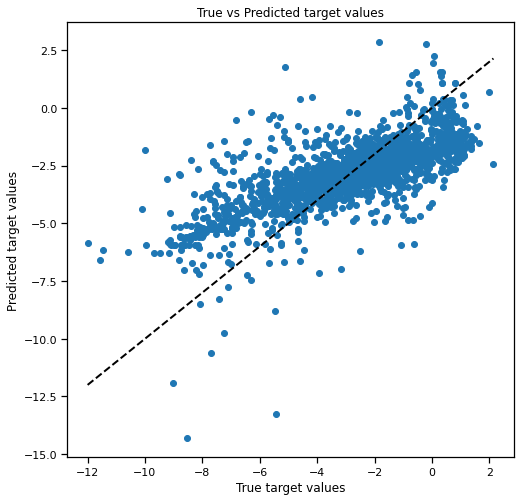

In [16]:
# create the model
ridge_regr = Ridge(alpha=0.5, solver="svd") # solver is only set to avoid errors with older sklearn versions
# fit it 
ridge_regr.fit(x_train, y_train)
# get predictions
ridge_predictions = ridge_regr.predict(x_test)
# print the coefficients 
print("The coefficients are:\n", ridge_regr.intercept_, " and ", ridge_regr.coef_)
# evaluate the performance 
print("MAE = ", mean_absolute_error(y_test, ridge_predictions))
print("RMSE = ", mean_squared_error(y_test, ridge_predictions, squared=False))
print("R2 = ", r2_score(y_test, ridge_predictions))
# plot the predictions against the true values 
plot_regression_predictions(y_test, ridge_predictions)

We see that solubility is not an easy property to predict. At least linearly with the properties, that we have access to. Maybe we can predict solubility better in the next lectures.